9. Using SVM algorithm, predict if a patient has a benign tumor or malignant tumor (cancer) based on the features provided. Use the following kernel for the SVM algorithm:
a) Linear b) Polynomial c) RBF d) Sigmoid
Find the following metrics for each of the SVM algorithms:
1) Accuracy 2) Recall 3) Precision 4) F1-Score
5) Jaccard Score 6) Error rates 7) Confusion Matrix
Compare all four SVM models using an ROC curve.


Performance Metrics:

         Accuracy  Recall  Precision  F1 Score  Jaccard  Error Rate     AUC
Kernel                                                                     
linear     0.9489  0.8966     0.9811    0.9369   0.8814      0.0511  0.9976
poly       0.8832  0.7241     1.0000    0.8400   0.7241      0.1168  0.9985
rbf        0.9562  0.9138     0.9815    0.9464   0.8983      0.0438  0.9963
sigmoid    0.9197  0.8448     0.9608    0.8991   0.8167      0.0803  0.9939


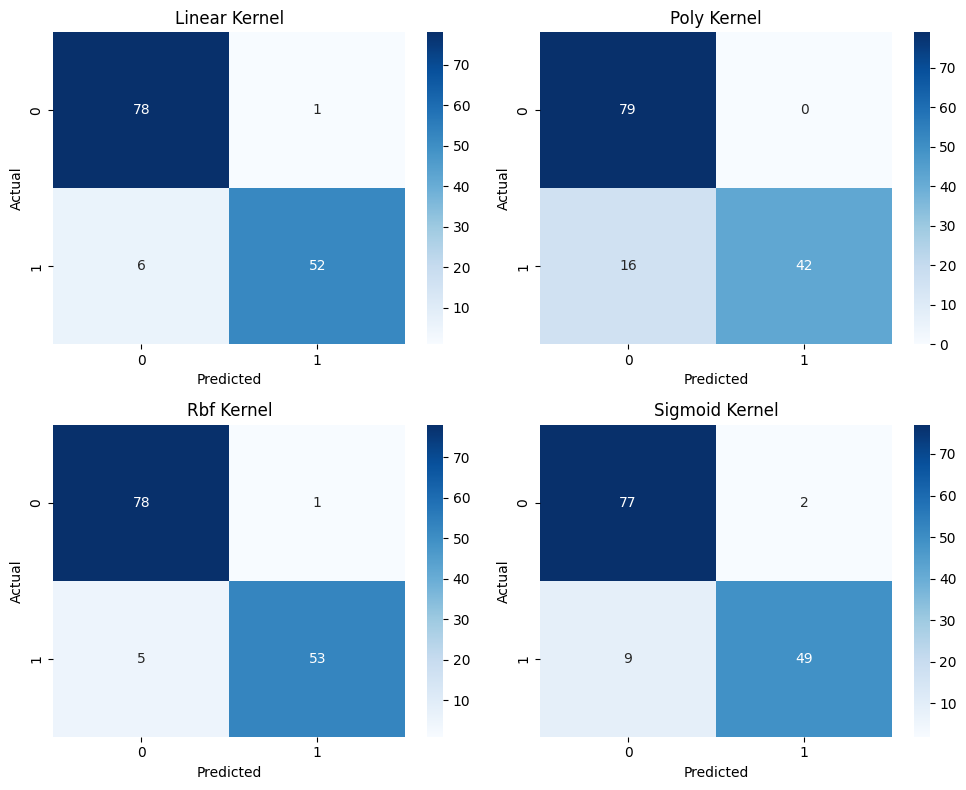

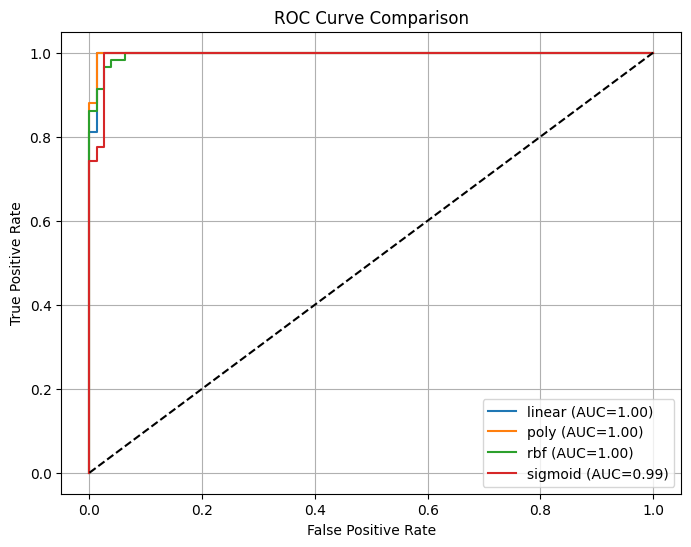

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)

# Load and clean dataset
df = pd.read_csv('samples_cancer.csv')
df.drop(columns=['ID'], inplace=True)
df['Class'] = df['Class'].apply(lambda x: 1 if x == 4 else 0)
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df = df.apply(pd.to_numeric)

# Prepare features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Define SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

# Train and evaluate models
for k in kernels:
    model = SVC(kernel=k, probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        'Kernel': k,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Jaccard': jaccard_score(y_test, y_pred),
        'Error Rate': 1 - accuracy_score(y_test, y_pred),
        'Conf Matrix': confusion_matrix(y_test, y_pred),
        'ROC': roc_curve(y_test, y_prob),
        'AUC': auc(*roc_curve(y_test, y_prob)[:2])
    })

# Display metrics as table
summary = pd.DataFrame([{k: v for k, v in r.items() if k not in ['Conf Matrix', 'ROC']} for r in results])
summary.set_index('Kernel', inplace=True)
print("\nPerformance Metrics:\n")
print(summary.round(4))

# Plot confusion matrices
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()
for i, r in enumerate(results):
    sns.heatmap(r['Conf Matrix'], annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f"{r['Kernel'].capitalize()} Kernel")
    axs[i].set_xlabel("Predicted")
    axs[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(8, 6))
for r in results:
    fpr, tpr, _ = r['ROC']
    plt.plot(fpr, tpr, label=f"{r['Kernel']} (AUC={r['AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


Here is the consolidated code that combines the best practices from all the provided code blocks. It includes **SelectKBest** for feature selection and implements the problem statement to predict whether a tumor is benign or malignant using SVM with different kernels.



Selected Features: ['UnifSize', 'UnifShape', 'BareNuc', 'BlandChrom', 'NormNucl']


C:\Users\Hp\AppData\Local\Temp\ipykernel_40040\3823278987.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


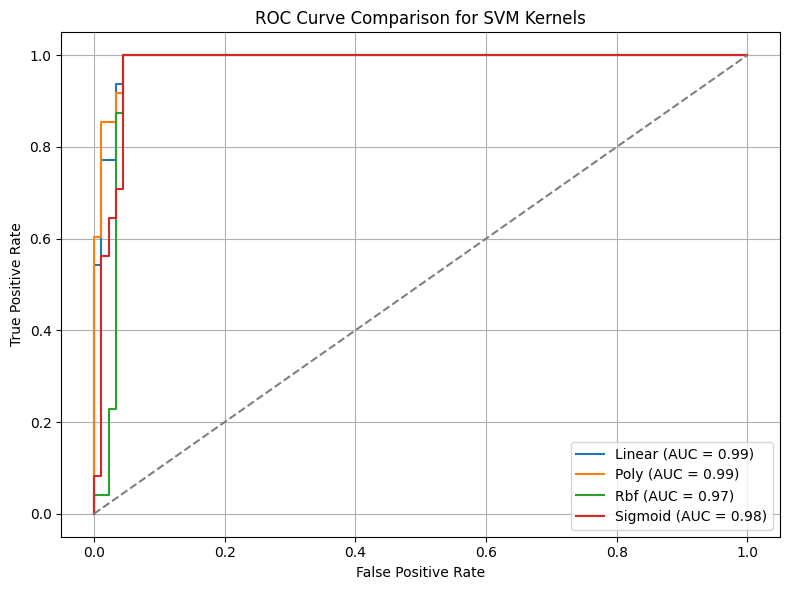

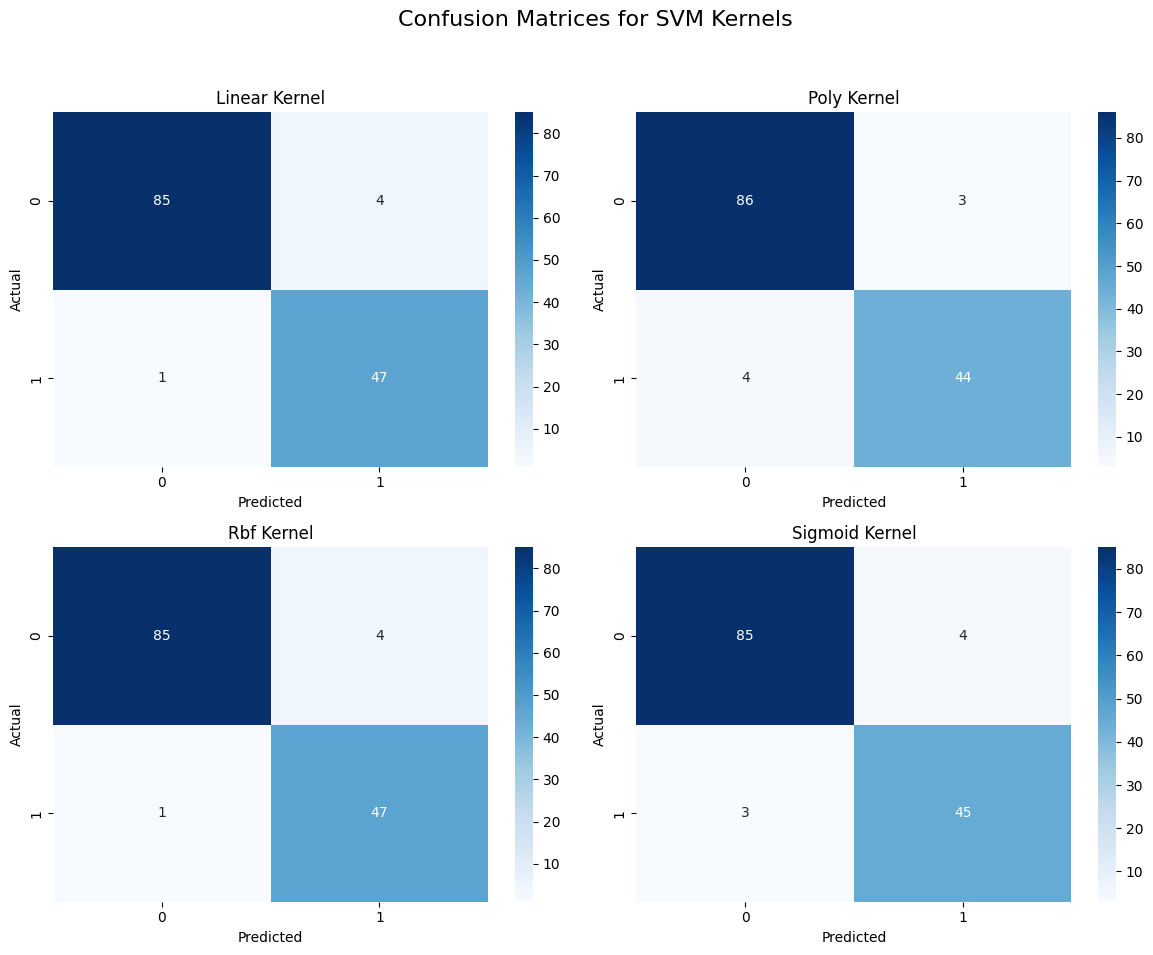

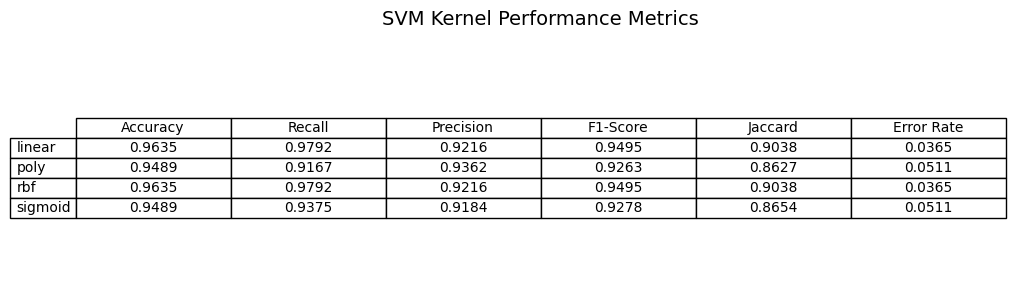

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
)

# Load and preprocess dataset
df = pd.read_csv('samples_cancer.csv')
df.columns = ['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class']
df.drop(['ID'], axis=1, inplace=True)
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')
df.dropna(inplace=True)

# Prepare features and target
X = df.drop(['Class'], axis=1)
y = df['Class'].apply(lambda x: 1 if x == 4 else 0)  # Malignant = 1, Benign = 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using SelectKBest
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}")

# Define SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}
roc_data = {}
conf_matrices = {}

# Train and evaluate models
for kernel in kernels:
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1]

    # Store metrics
    results[kernel] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Jaccard': jaccard_score(y_test, y_pred),
        'Error Rate': 1 - accuracy_score(y_test, y_pred),
    }

    # Store ROC data and confusion matrix
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data[kernel] = (fpr, tpr, auc(fpr, tpr))
    conf_matrices[kernel] = confusion_matrix(y_test, y_pred)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
for kernel, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{kernel.capitalize()} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.title('ROC Curve Comparison for SVM Kernels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Confusion Matrices
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()
for idx, kernel in enumerate(kernels):
    sns.heatmap(conf_matrices[kernel], annot=True, fmt='d', cmap='Blues', ax=axs[idx])
    axs[idx].set_title(f'{kernel.capitalize()} Kernel')
    axs[idx].set_xlabel('Predicted')
    axs[idx].set_ylabel('Actual')
plt.suptitle('Confusion Matrices for SVM Kernels', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display Metrics in a Table
metrics_df = pd.DataFrame(results).T.round(4)
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values,
                 colLabels=metrics_df.columns,
                 rowLabels=metrics_df.index,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("SVM Kernel Performance Metrics", fontsize=14, pad=20)
plt.show()

The provided file implements a machine learning pipeline to predict whether a tumor is benign or malignant using the **Support Vector Machine (SVM)** algorithm. The code evaluates the performance of SVM models with four different kernels (`linear`, `poly`, `rbf`, and `sigmoid`) and computes various metrics for comparison. Below is a detailed explanation of the code:

---

### **1. Problem Statement**
The goal is to predict whether a tumor is benign or malignant based on features provided in the dataset. The SVM algorithm is used with the following kernels:
- **Linear**
- **Polynomial**
- **Radial Basis Function (RBF)**
- **Sigmoid**

The following metrics are computed for each kernel:
1. Accuracy
2. Recall
3. Precision
4. F1-Score
5. Jaccard Score
6. Error Rate
7. Confusion Matrix

Additionally, the models are compared using **ROC curves**.

---

### **2. Importing Libraries**


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)

- **`pandas`**: For data manipulation and analysis.
- **`numpy`**: For numerical operations.
- **`matplotlib` and `seaborn`**: For data visualization.
- **`sklearn`**: For preprocessing, model training, and evaluation metrics.

---

### **3. Loading and Cleaning the Dataset**


In [4]:
df = pd.read_csv('samples_cancer.csv')
df.drop(columns=['ID'], inplace=True)
df['Class'] = df['Class'].apply(lambda x: 1 if x == 4 else 0)
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df = df.apply(pd.to_numeric)

- **Dataset**: The dataset is loaded from a CSV file (`samples_cancer.csv`).
- **Dropping `ID`**: The `ID` column is irrelevant for classification and is removed.
- **Target Conversion**: The `Class` column is converted to binary values:
  - `1` for malignant tumors.
  - `0` for benign tumors.
- **Handling Missing Values**: Missing values (`?`) are replaced with `NaN`, and rows with missing values are dropped.
- **Numeric Conversion**: All columns are converted to numeric data types.

---

### **4. Splitting Features and Target**


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **Features (`X`)**: All columns except the last one are used as features.
- **Target (`y`)**: The last column (`Class`) is used as the target variable.
- **Train-Test Split**: The dataset is split into training (80%) and testing (20%) sets.

---

### **5. Scaling Features**


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- **StandardScaler**: Standardizes the features by removing the mean and scaling to unit variance. This ensures that all features are on the same scale, which is important for SVM.

---

### **6. Defining SVM Kernels**


In [7]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

- **Kernels**: The four SVM kernels to be evaluated are defined in a list:
  - `linear`: Linear decision boundary.
  - `poly`: Polynomial decision boundary.
  - `rbf`: Radial Basis Function (non-linear decision boundary).
  - `sigmoid`: Sigmoid decision boundary.

---

### **7. Training and Evaluating Models**


In [8]:
for k in kernels:
    model = SVC(kernel=k, probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        'Kernel': k,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Jaccard': jaccard_score(y_test, y_pred),
        'Error Rate': 1 - accuracy_score(y_test, y_pred),
        'Conf Matrix': confusion_matrix(y_test, y_pred),
        'ROC': roc_curve(y_test, y_prob),
        'AUC': auc(*roc_curve(y_test, y_prob)[:2])
    })

- **Model Training**: An SVM model is trained for each kernel using the training data.
- **Predictions**:
  - `y_pred`: Predicted class labels.
  - `y_prob`: Predicted probabilities for the positive class (malignant).
- **Metrics**:
  - **Accuracy**: Proportion of correct predictions.
  - **Recall**: Proportion of actual positives correctly identified.
  - **Precision**: Proportion of predicted positives that are correct.
  - **F1-Score**: Harmonic mean of precision and recall.
  - **Jaccard Score**: Intersection over union for predicted and actual labels.
  - **Error Rate**: Proportion of incorrect predictions.
  - **Confusion Matrix**: Counts of true positives, true negatives, false positives, and false negatives.
  - **ROC Curve**: False Positive Rate (FPR) and True Positive Rate (TPR) are calculated for plotting the ROC curve.
  - **AUC**: Area Under the Curve, a measure of the model's ability to distinguish between classes.

---

### **8. Displaying Metrics as a Table**


In [9]:
summary = pd.DataFrame([{k: v for k, v in r.items() if k not in ['Conf Matrix', 'ROC']} for r in results])
summary.set_index('Kernel', inplace=True)
print("\nPerformance Metrics:\n")
print(summary.round(4))


Performance Metrics:

         Accuracy  Recall  Precision  F1 Score  Jaccard  Error Rate     AUC
Kernel                                                                     
linear     0.9708  0.9483     0.9821    0.9649   0.9322      0.0292  0.9980
poly       0.9197  0.8103     1.0000    0.8952   0.8103      0.0803  0.9987
rbf        0.9635  0.9483     0.9649    0.9565   0.9167      0.0365  0.9974
sigmoid    0.9562  0.9310     0.9643    0.9474   0.9000      0.0438  0.9843


- **Metrics Table**: The computed metrics for each kernel are displayed in a tabular format.

---

### **9. Plotting Confusion Matrices**


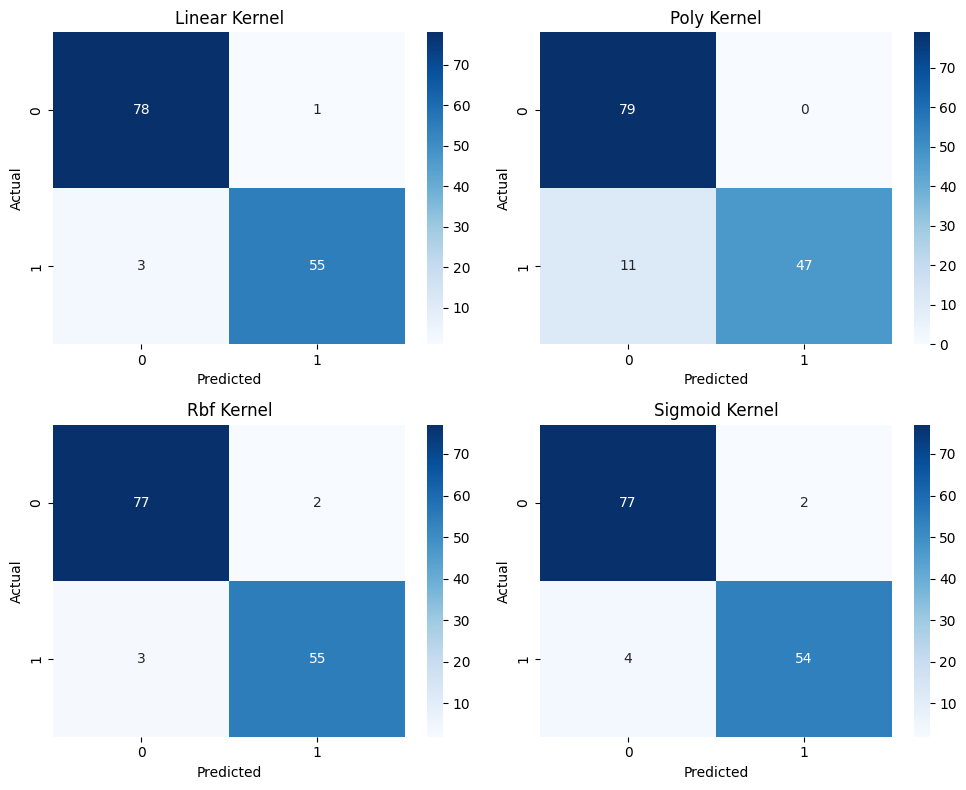

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()
for i, r in enumerate(results):
    sns.heatmap(r['Conf Matrix'], annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f"{r['Kernel'].capitalize()} Kernel")
    axs[i].set_xlabel("Predicted")
    axs[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

- **Confusion Matrices**: Visualizes the confusion matrix for each kernel as a heatmap.

---

### **10. Plotting ROC Curves**


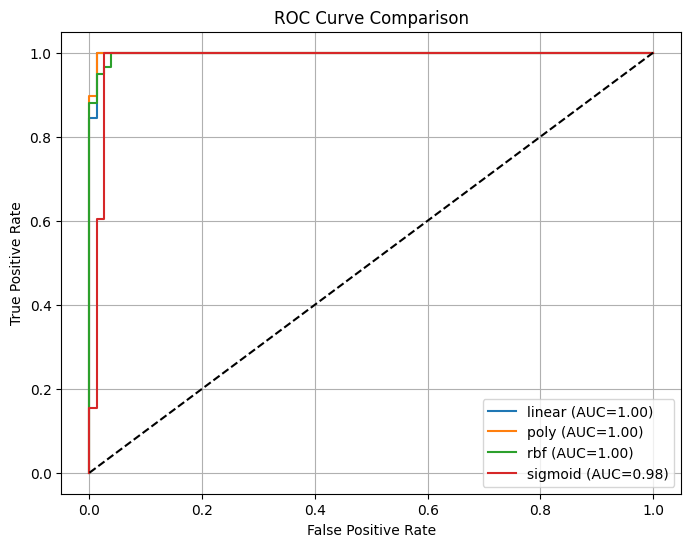

In [11]:
plt.figure(figsize=(8, 6))
for r in results:
    fpr, tpr, _ = r['ROC']
    plt.plot(fpr, tpr, label=f"{r['Kernel']} (AUC={r['AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

- **ROC Curves**: Plots the ROC curve for each kernel, showing the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR).
- **AUC**: The Area Under the Curve (AUC) is displayed in the legend for each kernel.

---

### **Summary**
This code evaluates the performance of SVM models with four different kernels (`linear`, `poly`, `rbf`, `sigmoid`) on a cancer classification dataset. It computes various metrics, visualizes confusion matrices, and plots ROC curves for comparison. The results help determine which kernel performs best for the given classification task.



---

### **Key Features of the Code**
1. **Feature Selection**:
   - Uses `SelectKBest` with ANOVA F-test (`f_classif`) to select the top 5 most significant features.

2. **SVM Kernels**:
   - Trains and evaluates SVM models with four kernels: `linear`, `poly`, `rbf`, and `sigmoid`.

3. **Metrics**:
   - Computes accuracy, recall, precision, F1-score, Jaccard score, and error rate for each kernel.

4. **Visualization**:
   - Plots ROC curves for all kernels.
   - Displays confusion matrices for each kernel.
   - Summarizes metrics in a table.

5. **Scalability**:
   - The code is modular and can be easily extended to include additional kernels or metrics.

---

### **Output**
- **Selected Features**: Displays the top 5 features selected by `SelectKBest`.
- **ROC Curves**: Visualizes the performance of each kernel in distinguishing between classes.
- **Confusion Matrices**: Shows the classification results for each kernel.
- **Metrics Table**: Summarizes the performance metrics for all kernels.

training with linear kernel..
training with poly kernel..
training with rbf kernel..
training with sigmoid kernel..


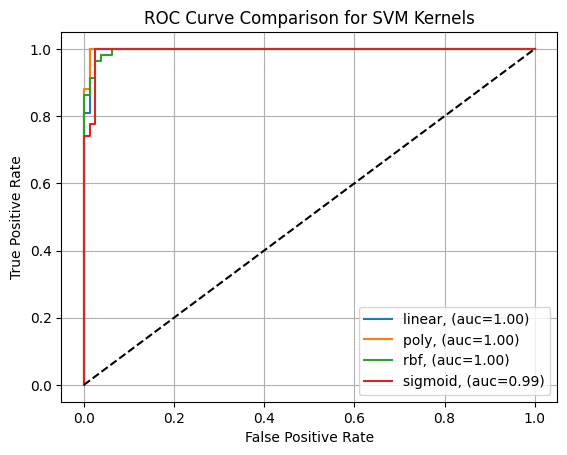

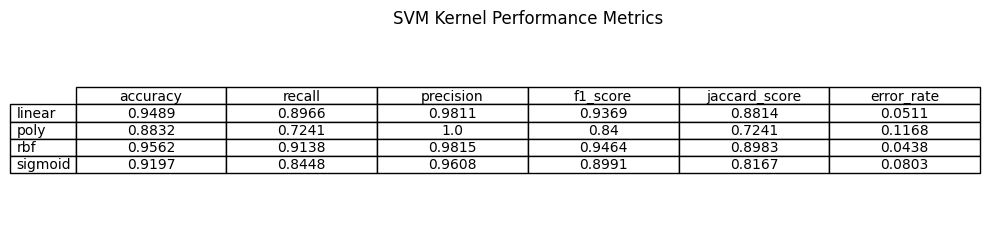

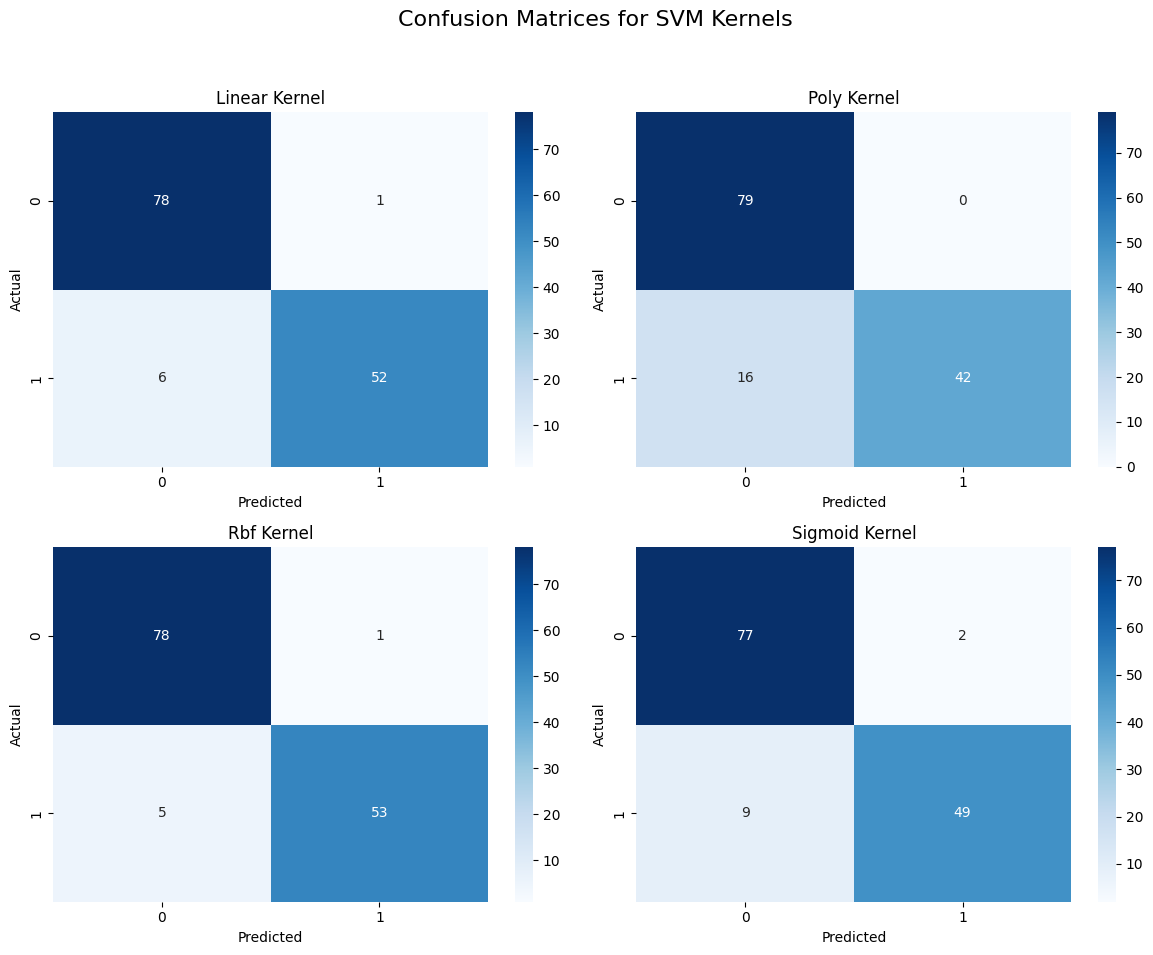

In [12]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('samples_cancer.csv')

df.drop(columns=['ID'] , inplace=True)

df['Class'] = df['Class'].apply(lambda x: 1 if x == 4 else 0)

df.replace("?", np.nan , inplace=True )
df.dropna(inplace=True)

x=df.iloc[:, :-1]
y=df.iloc[:, -1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

x_train = scaler().fit_transform(x_train)
x_test = scaler().fit_transform(x_test)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
metrix = []

for k in kernels:
    print(f"training with {k} kernel..")
    model=SVC(kernel=k, probability=True)
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    y_prob=model.predict_proba(x_test)[:,-1]
    acc=accuracy_score(y_test, y_pred)
    recall= recall_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    f1=f1_score(y_test,y_pred)
    jaccard=jaccard_score(y_test, y_pred)
    error=1-acc
    conf_matrix= confusion_matrix(y_test, y_pred)
    
    metrix.append({
        'kernel':k,
        'accuracy':acc,
        'recall':recall,
        'precision':precision,
        'f1_score':f1,
        'jaccard_score':jaccard,
        'error_rate':error,
        'confusion_matrix':conf_matrix
    })
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{k}, (auc={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison for SVM Kernels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# display the metrics in a table
metrics_df = pd.DataFrame(metrix)
metrics_df_display = metrics_df.drop(columns=['confusion_matrix']).set_index('kernel').round(4)

fig, ax = plt.subplots(figsize=(10, 2.5))
ax.axis('off')
tbl = ax.table(cellText=metrics_df_display.values,
               colLabels=metrics_df_display.columns,
               rowLabels=metrics_df_display.index,
               loc='center', cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
plt.title('SVM Kernel Performance Metrics')
plt.tight_layout()
plt.show()

# Plot confusion matrices for each kernel
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, entry in enumerate(metrix):
    cm = entry['confusion_matrix']
    kernel = entry['kernel']
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f'{kernel.capitalize()} Kernel')
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')

plt.suptitle('Confusion Matrices for SVM Kernels', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


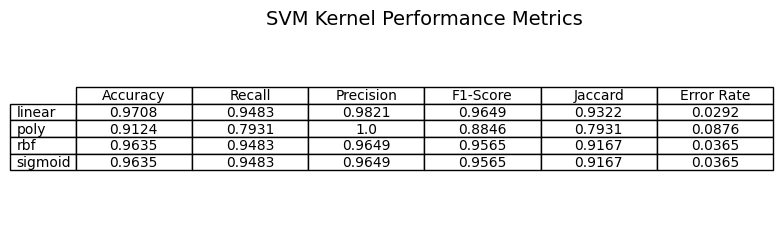

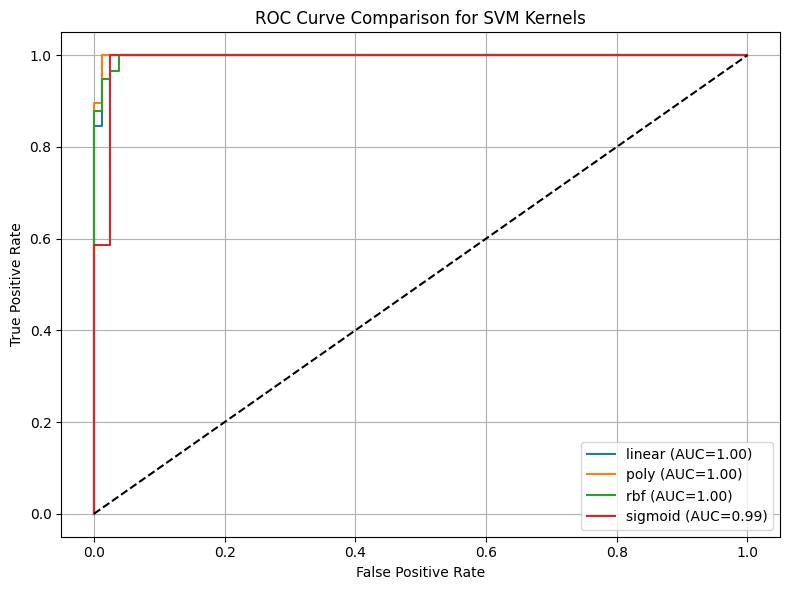

In [13]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, jaccard_score, roc_curve, auc

# Load and preprocess
df = pd.read_csv('samples_cancer.csv')
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')
df = df.drop(['ID'], axis=1).dropna()
X, y = df.drop('Class', axis=1), df['Class'].apply(lambda x: 1 if x == 4 else 0)
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.2, random_state=42)

# Train and evaluate SVMs
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results, roc_info = {}, {}
for k in kernels:
    m = SVC(kernel=k, probability=True).fit(X_train, y_train)
    p, prob = m.predict(X_test), m.predict_proba(X_test)[:,1]
    results[k] = [accuracy_score(y_test, p), recall_score(y_test, p),
                  precision_score(y_test, p), f1_score(y_test, p),
                  jaccard_score(y_test, p), 1 - accuracy_score(y_test, p)]
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_info[k] = (fpr, tpr, auc(fpr, tpr))

# Plot metrics table
metrics_df = pd.DataFrame(results, index=['Accuracy','Recall','Precision','F1-Score','Jaccard','Error Rate']).T.round(4)
fig, ax = plt.subplots(figsize=(9, 2.5))
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns,
                 rowLabels=metrics_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title('SVM Kernel Performance Metrics', fontsize=14)
plt.savefig("svm_metrics_table.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot ROC Curves
plt.figure(figsize=(8, 6))
for k, (fpr, tpr, auc_val) in roc_info.items():
    plt.plot(fpr, tpr, label=f'{k} (AUC={auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison for SVM Kernels')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig("svm_roc_curve_comparison.png", dpi=300)
plt.show()
